In [3]:
import scipy.stats
import os
import csv
from scipy.special import erf, erfinv
import numpy as np
%matplotlib nbagg
import matplotlib.pyplot as plt
import cPickle


In [4]:

fp = open('variability_data.pkl', 'r')
d = cPickle.load(fp)
fp.close()

In [107]:




Alpha=np.arange(0,31.)
Beta=np.arange(1,51.)
locations=np.arange(0,31.)


alpha,beta=np.meshgrid(Alpha,Beta)

shape=alpha.shape

prior=alpha*0+1
prior=prior/prior.sum()

<IPython.core.display.Javascript object>


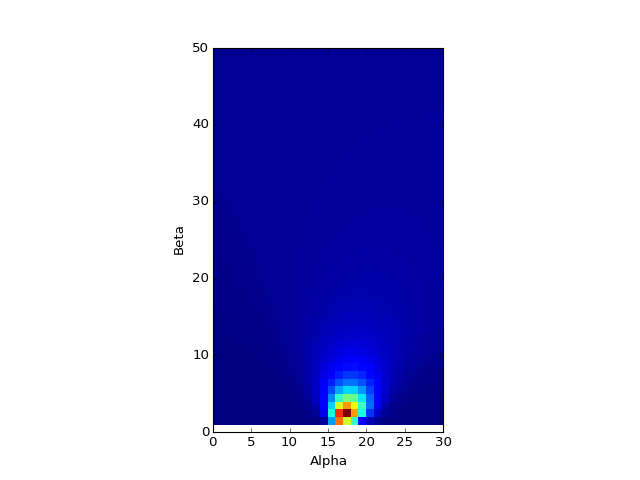

<IPython.core.display.Javascript object>


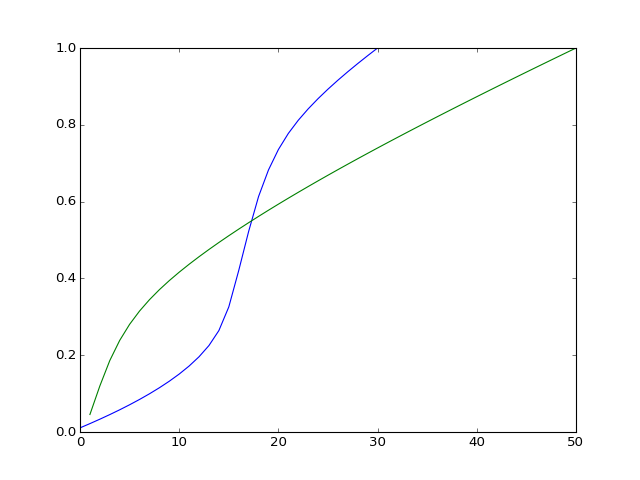

In [108]:
def prob1(x,alpha,beta):
    constant=np.stack([1/(beta*(1+((loc-alpha)/beta)**2)) for loc in locations])
    constant=constant.sum(0)
    return 1/(beta*(1+((x-alpha)/beta)**2))/constant

def prob2(x,alpha, beta):
    theta = np.arctan2(x - alpha, beta)
    speed = beta / np.cos(theta)**2
    return 1/speed

posterior=prior.copy()
shots=[15,16,18,21]
for x in shots:
    posterior=posterior*prob1(x,alpha,beta)
posterior[beta==0]=0
    
posterior=posterior/posterior.sum()

plt.figure()
plt.pcolormesh(Alpha,Beta,posterior)
plt.gca().set_aspect(1)
plt.xlabel('Alpha')
plt.ylabel('Beta')

plt.figure()
plt.plot(Alpha,np.cumsum(posterior.sum(0)))
plt.plot(Beta,np.cumsum(posterior.sum(1)))

<IPython.core.display.Javascript object>


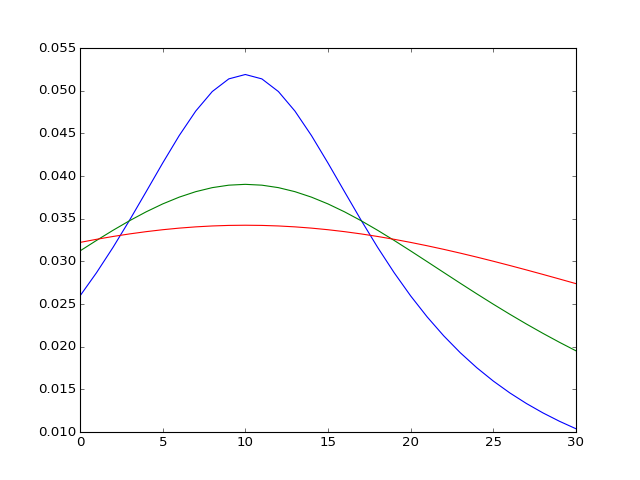

In [109]:
plt.figure()
d=prob(Locations,10,10);d=d/d.sum();plt.plot(d)
d=prob(Locations,10,20);d=d/d.sum();plt.plot(d)
d=prob(Locations,10,40);d=d/d.sum();plt.plot(d)

<IPython.core.display.Javascript object>


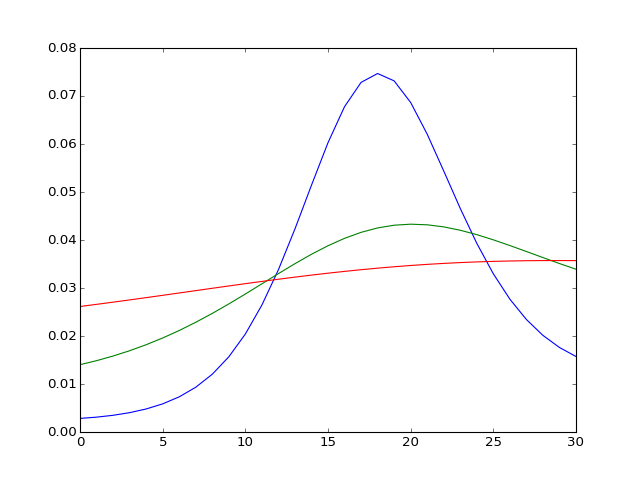

In [110]:
plt.figure()
d=posterior[10,:];d=d/d.sum();plt.plot(d)
d=posterior[20,:];d=d/d.sum();plt.plot(d)
d=posterior[40,:];d=d/d.sum();plt.plot(d)

<IPython.core.display.Javascript object>


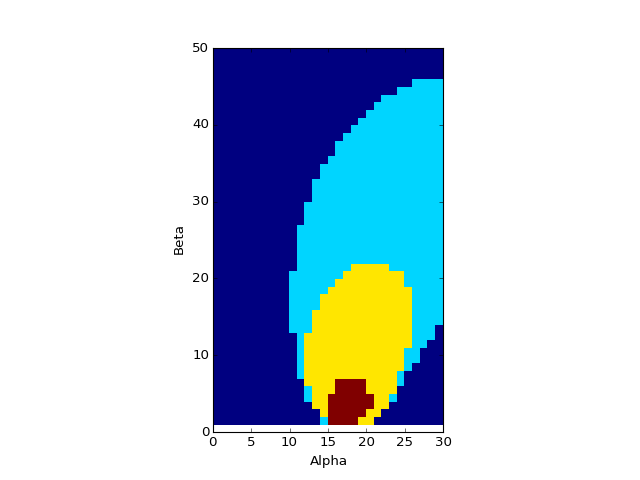

<function __main__.prob1>

In [113]:
post1d=posterior.reshape(-1)

sortedind=post1d.argsort()
post1dsort=post1d[sortedind]
post1dsortcum=np.cumsum(post1dsort)
sortedind_rev = np.zeros(sortedind.shape[0], dtype=int)
sortedind_rev[sortedind] = np.arange(sortedind.shape[0])
plt.figure()

maskplot=posterior*0
for p in [0.75,0.5,0.25]:

    sortedindmask=np.zeros(sortedind.shape,dtype=np.bool)
    sortedindmask[post1dsortcum>(1-p)]=True

    indmask=sortedindmask[sortedind_rev]
    mask=indmask.reshape(shape)
    
    maskplot[mask]=1-p

plt.pcolormesh(Alpha,Beta,maskplot)
plt.gca().set_aspect(1)
plt.xlabel('Alpha')
plt.ylabel('Beta')



prob1